<a href="https://colab.research.google.com/github/7201krap/PYTORCH_project/blob/main/all_seeds_5subsequent_batchsize1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.utils import shuffle
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

root_dir = './'
torchvision.datasets.MNIST(root=root_dir,download=True)

--2021-04-08 17:30:01--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-04-08 17:30:01--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz.2’

MNIST.tar.gz.2          [       <=>          ]  33.20M  5.97MB/s    in 15s     

2021-04-08 17:30:17 (2.16 MB/s) - ‘MNIST.tar.gz.2’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
mnist_trainset = torchvision.datasets.MNIST(root=root_dir, train=True, 
                                download=True, 
                                transform=transforms.Compose([transforms.ToTensor()]))

mnist_testset  = torchvision.datasets.MNIST(root=root_dir, 
                                train=False, 
                                download=True, 
                                transform=transforms.Compose([transforms.ToTensor()]))

test_dataloader  = torch.utils.data.DataLoader(mnist_testset, 
                                               batch_size=50, 
                                               shuffle=False)

In [5]:
new_mnist_trainset =  [ [[],[]] for i in range(10)]
# new_mnist_testset  =  [ [[],[]] for i in range(10)]

for i in range(60000):
    for j in range(10):
        # 만약에 label 이 j 이면, 
        if mnist_trainset[i][1] == j:
            # image 
            new_mnist_trainset[j][0].append(mnist_trainset[i][0])  
            # new_mnist_trainset[j][0] 는 j label 에 해당하는 image 가 들어있다. 

            # label
            new_mnist_trainset[j][1].append(mnist_trainset[i][1])
            # new_mnist_trainset[j][1] 는 j label 에 해당하는 label 가 들어있다. 



In [6]:
print("0", len(new_mnist_trainset[0][0]))    # - pop 3 times
print("1", len(new_mnist_trainset[1][0]))    # - pop 2 times
print("2", len(new_mnist_trainset[2][0]))    # - pop 3 times
print("3", len(new_mnist_trainset[3][0]))    # - pop 1 times
print("4", len(new_mnist_trainset[4][0]))    # - pop 2 time
print("5", len(new_mnist_trainset[5][0]))    # - pop 1 times
print("6", len(new_mnist_trainset[6][0]))    # - pop 3 times
print("7", len(new_mnist_trainset[7][0]))    # - pop 0 times
print("8", len(new_mnist_trainset[8][0]))    # - pop 1 times
print("9", len(new_mnist_trainset[9][0]))    # - pop 4 times

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


In [7]:
# 0 - pop 3 times
for i in range(3):
    new_mnist_trainset[0][0].pop()
    new_mnist_trainset[0][1].pop()

# 1 - pop 2 times
for i in range(2):
    new_mnist_trainset[1][0].pop()
    new_mnist_trainset[1][1].pop()

# 2 - pop 3 times
for i in range(3):
    new_mnist_trainset[2][0].pop()
    new_mnist_trainset[2][1].pop()

# 3 - pop 1 times
for i in range(1):
    new_mnist_trainset[3][0].pop()
    new_mnist_trainset[3][1].pop()

# 4 - pop 2 time
for i in range(2):
    new_mnist_trainset[4][0].pop()
    new_mnist_trainset[4][1].pop()

# 5 - pop 1 times
for i in range(1):
    new_mnist_trainset[5][0].pop()
    new_mnist_trainset[5][1].pop()

# 6 - pop 3 times
for i in range(3):
    new_mnist_trainset[6][0].pop()
    new_mnist_trainset[6][1].pop()

# 7 - pop 0 times

# 8 - pop 1 times
for i in range(1):
    new_mnist_trainset[8][0].pop()
    new_mnist_trainset[8][1].pop()

# 9 - pop 4 times
for i in range(4):
    new_mnist_trainset[9][0].pop()
    new_mnist_trainset[9][1].pop()

In [8]:
print("0", len(new_mnist_trainset[0][0]))    # pop 3 times
print("1", len(new_mnist_trainset[1][0]))    # pop 2 times
print("2", len(new_mnist_trainset[2][0]))    # pop 3 times
print("3", len(new_mnist_trainset[3][0]))    # pop 1 times
print("4", len(new_mnist_trainset[4][0]))    # pop 2 time
print("5", len(new_mnist_trainset[5][0]))    # pop 1 times
print("6", len(new_mnist_trainset[6][0]))    # pop 3 times
print("7", len(new_mnist_trainset[7][0]))    # pop 0 times
print("8", len(new_mnist_trainset[8][0]))    # pop 1 times
print("9", len(new_mnist_trainset[9][0]))    # pop 4 times

print("0", len(new_mnist_trainset[0][1]))    # pop 3 times
print("1", len(new_mnist_trainset[1][1]))    # pop 2 times
print("2", len(new_mnist_trainset[2][1]))    # pop 3 times
print("3", len(new_mnist_trainset[3][1]))    # pop 1 times
print("4", len(new_mnist_trainset[4][1]))    # pop 2 time
print("5", len(new_mnist_trainset[5][1]))    # pop 1 times
print("6", len(new_mnist_trainset[6][1]))    # pop 3 times
print("7", len(new_mnist_trainset[7][1]))    # pop 0 times
print("8", len(new_mnist_trainset[8][1]))    # pop 1 times
print("9", len(new_mnist_trainset[9][1]))    # pop 4 times

0 5920
1 6740
2 5955
3 6130
4 5840
5 5420
6 5915
7 6265
8 5850
9 5945
0 5920
1 6740
2 5955
3 6130
4 5840
5 5420
6 5915
7 6265
8 5850
9 5945


In [9]:
image_trainset = list()
label_trainset = list()

for i in range(10):
    image_trainset.append(new_mnist_trainset[i][0])
    label_trainset.append(new_mnist_trainset[i][1])

In [10]:
flattened_image_train = list()
flattened_label_train = list()

# flattening image 
for sublist in image_trainset:
    for val in sublist:
        flattened_image_train.append(val)

# flattening label
for sublist in label_trainset:
    for val in sublist:
        flattened_label_train.append(val)

In [11]:
len(flattened_image_train)

59980

In [12]:
len(flattened_label_train)

59980

In [13]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n))

In [14]:
list1 = list(split(flattened_image_train, 11996))
list2 = list(split(flattened_label_train, 11996))

In [15]:
X, y = shuffle(list1, list2)

In [16]:
X_final, y_final = shuffle(X, y)

In [17]:
flattened_X_final = [val for sublist in X_final for val in sublist] 
flattened_y_final = [val for sublist in y_final for val in sublist] 

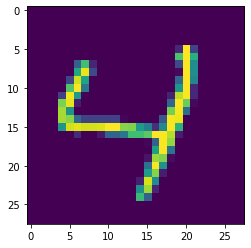

In [18]:
plt.imshow(flattened_X_final[0].reshape(28,28))

In [19]:
flattened_image_train = torch.stack(flattened_X_final)
flattened_label_train = torch.Tensor(flattened_y_final)
flattened_label_train = flattened_label_train.type(torch.LongTensor)

In [20]:
train_dataset = TensorDataset(flattened_image_train, flattened_label_train)
train_dataloader = DataLoader(train_dataset, batch_size=1)

In [21]:
# Define the model 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear_1 = torch.nn.Linear(784, 256)
        self.linear_2 = torch.nn.Linear(256, 10)
        self.sigmoid  = torch.nn.Sigmoid()

    def forward(self, x):
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.sigmoid(x)
        pred = self.linear_2(x)

        return pred

In [22]:
def get_activation(model):    
    def hook(module, input, output):
        model.layer_activations = output
    return hook

In [23]:
def selectivity(hidden_layer_each_neuron):
    __selectivity__ = list()
    # I will now try to find the average of each class for each neuron.
    # check out the next cell 
    avg_activations = [dict() for x in range(256)]
    for i, neuron in enumerate(hidden_layer_each_neuron):
        for k, v in neuron.items():
            # v is the list of activations for hidden layer's neuron k 
            avg_activations[i][k] = sum(v) / float(len(v))

    # generate 256 lists to get only values in avg_activations
    only_activation_vals = [list() for x in range(256)]

    # get only values from avg_activations
    for i, avg_activation in enumerate(avg_activations):
        for value in avg_activation.values():
            only_activation_vals[i].append(value)

    for activation_val in only_activation_vals:
        # find u_max 
        u_max = np.max(activation_val)

        # find u_minus_max 
        u_minus_max = (np.sum(activation_val) - u_max) / 9

        # find selectivity 
        selectivity = (u_max - u_minus_max) / (u_max + u_minus_max)

        # append selectivity value to selectivity
        __selectivity__.append(selectivity)

    avg_selectivity = np.average(__selectivity__)
    std_selectivity = np.std(__selectivity__)
                                 
    return avg_selectivity, std_selectivity

In [24]:
def sparsity_calculator(final_spareness):
    sparseness_list_avg = list()
    sparseness_list_std = list()
    for single_epoch_spareness in final_spareness:

        hidden_layer_activation_list = single_epoch_spareness
        hidden_layer_activation_list = torch.stack(hidden_layer_activation_list)
        layer_activations_list = torch.reshape(hidden_layer_activation_list, (10000, 256))

        layer_activations_list = torch.abs(layer_activations_list)  # modified 
        num_neurons = layer_activations_list.shape[1]
        population_sparseness = (np.sqrt(num_neurons) - (torch.sum(layer_activations_list, dim=1) / torch.sqrt(torch.sum(layer_activations_list ** 2, dim=1)))) / (np.sqrt(num_neurons) - 1)

        mean_sparseness_per_epoch = torch.mean(population_sparseness)
        std_sparseness_per_epoch  = torch.std(population_sparseness)

        sparseness_list_avg.append(mean_sparseness_per_epoch)
        sparseness_list_std.append(std_sparseness_per_epoch)

    return sparseness_list_avg, sparseness_list_std

In [25]:
no_epochs = 30
def sparsity_selectivity_trainer(optimizer, model):

    criterion = torch.nn.CrossEntropyLoss()
    train_loss = list()
    test_loss  = list()
    test_acc   = list()

    final_spareness = list()
    
    final_selectivity_avg_list = list()
    final_selectivity_std_list = list()

    best_test_loss = 1

    for epoch in range(no_epochs):

        _hidden_layer_each_neuron_ = [{0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]} for x in range(256)]
        _hidden_layer_each_neuron_ = np.array(_hidden_layer_each_neuron_)

        hidden_layer_activation_list = list()

        total_train_loss = 0
        total_test_loss = 0

        # training
        # set up training mode 
        model.train()

        for itr, (images, labels) in enumerate(train_dataloader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            pred = model(images)

            loss = criterion(pred, labels)
            total_train_loss += loss.item()

            loss.backward()
            optimizer.step()

            # Print/Append activation of the hidden layer 
            # print(model.layer_activations.shape)
            # model.layer_activations

        total_train_loss = total_train_loss / (itr + 1)
        train_loss.append(total_train_loss)

        # testing 
        # change to evaluation mode 
        model.eval()
        total = 0
        for itr, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)

            pred = model(images)

            loss = criterion(pred, labels)
            total_test_loss += loss.item()

            # we now need softmax because we are testing.
            pred = torch.nn.functional.softmax(pred, dim=1)
            for i, p in enumerate(pred):
                if labels[i] == torch.max(p.data, 0)[1]:
                    total = total + 1

            hidden_layer_activation_list.append(model.layer_activations)

            
            for activation, label in zip(model.layer_activations, labels):
                # shape of activation and label: 256 and 1 
                
                # get the actual value of item. This is because label is now Tensor 
                label = label.item()

                # this is not part of gradient calculcation 
                with torch.no_grad():
                    activation = activation.numpy()

                # for each image/label, append activation value of neuron 
                for i in range(256):    # number of neurons in hidden layer 
                    _hidden_layer_each_neuron_[i][label].append(activation[i])

        avg_selectivity, std_selectivity = selectivity(_hidden_layer_each_neuron_)
        
        final_selectivity_avg_list.append(avg_selectivity)
        final_selectivity_std_list.append(std_selectivity)

        final_spareness.append(hidden_layer_activation_list)

        # caculate accuracy 
        accuracy = total / len(mnist_testset)

        # append accuracy here
        test_acc.append(accuracy)

        # append test loss here 
        total_test_loss = total_test_loss / (itr + 1)
        test_loss.append(total_test_loss)

        print('\nEpoch: {}/{}, Train Loss: {:.8f}, Test Loss: {:.8f}, Test Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss, total_test_loss, accuracy))

    sparsity_list_avg, sparsity_list_std = sparsity_calculator(final_spareness)

    average_sparsity = list()
    std_sparsity = list()
    for i in range(no_epochs):
        average_sparsity.append( (sparsity_list_avg[i].item()) / 1 )
        std_sparsity.append( (sparsity_list_std[i].item()) / 1 )
    # ***************** sparsity calculation ***************** #

    return test_acc, average_sparsity, std_sparsity, final_selectivity_avg_list, final_selectivity_std_list

# seed 1


In [26]:
torch.manual_seed(1)
np.random.seed(1)

# Adadelta
model_Adadelta = Model()
print("model_Adadelta:", model_Adadelta)
model_Adadelta.to(device)
model_Adadelta.sigmoid.register_forward_hook(get_activation(model_Adadelta))
optimizer_Adadelta = torch.optim.Adadelta(model_Adadelta.parameters(), lr=1.0)
Adadelta_test_acc, sparsity_avg, sparsity_std, Adadelta_avg_selectivity_list, Adadelta_std_selectivity_list = sparsity_selectivity_trainer(optimizer=optimizer_Adadelta, model=model_Adadelta)

f = open("seed1_5subsebatch1_sparsity_selectivity_Adadelta.txt", "w")
f.write(str(Adadelta_test_acc)+'\n'+str(sparsity_avg)+'\n'+str(sparsity_std)+'\n'+str(Adadelta_avg_selectivity_list)+'\n'+str(Adadelta_std_selectivity_list)+'\n\n')
f.close()

!cp seed1_5subsebatch1_sparsity_selectivity_Adadelta.txt /content/drive/MyDrive


# Adagrad 
model_Adagrad = Model()
print("model_Adagrad:", model_Adagrad)
model_Adagrad.to(device)
model_Adagrad.sigmoid.register_forward_hook(get_activation(model_Adagrad))
optimizer_Adagrad = torch.optim.Adagrad(model_Adagrad.parameters(), lr=0.1)
Adagrad_test_acc, sparsity_avg, sparsity_std, Adagrad_avg_selectivity_list, Adagrad_std_selectivity_list = sparsity_selectivity_trainer(optimizer=optimizer_Adagrad, model=model_Adagrad)

f = open("seed1_5subsebatch1_sparsity_selectivity_Adagrad.txt", "w")
f.write(str(Adagrad_test_acc)+'\n'+str(sparsity_avg)+'\n'+str(sparsity_std)+'\n'+str(Adagrad_avg_selectivity_list)+'\n'+str(Adagrad_std_selectivity_list)+'\n\n')
f.close()

!cp seed1_5subsebatch1_sparsity_selectivity_Adagrad.txt /content/drive/MyDrive


# SGD 
model_SGD = Model()
print("model_SGD:", model_SGD)
model_SGD.to(device)
model_SGD.sigmoid.register_forward_hook(get_activation(model_SGD))
optimizer_SGD = torch.optim.SGD(model_SGD.parameters(), lr=0.1)
SGD_test_acc, sparsity_avg, sparsity_std, SGD_avg_selectivity_list, SGD_std_selectivity_list = sparsity_selectivity_trainer(optimizer=optimizer_SGD, model=model_SGD)

f = open("seed1_5subsebatch1_sparsity_selectivity_SGD.txt", "w")
f.write(str(SGD_test_acc)+'\n'+str(sparsity_avg)+'\n'+str(sparsity_std)+'\n'+str(SGD_avg_selectivity_list)+'\n'+str(SGD_std_selectivity_list)+'\n\n')
f.close()

!cp seed1_5subsebatch1_sparsity_selectivity_SGD.txt /content/drive/MyDrive

# Adam 
model_Adam = Model()
print("model_Adam:", model_Adam)
model_Adam.to(device)
model_Adam.sigmoid.register_forward_hook(get_activation(model_Adam))
optimizer_Adam = torch.optim.Adam(model_Adam.parameters(), lr=0.001)
Adam_test_acc, sparsity_avg, sparsity_std, Adam_avg_selectivity_list, Adam_std_selectivity_list = sparsity_selectivity_trainer(optimizer=optimizer_Adam, model=model_Adam)

f = open("seed1_5subsebatch1_sparsity_selectivity_Adam.txt", "w")
f.write(str(Adam_test_acc)+'\n'+str(sparsity_avg)+'\n'+str(sparsity_std)+'\n'+str(Adam_avg_selectivity_list)+'\n'+str(Adam_std_selectivity_list)+'\n\n')
f.close()

!cp seed1_5subsebatch1_sparsity_selectivity_Adam.txt /content/drive/MyDrive

model_Adadelta: Model(
  (linear_1): Linear(in_features=784, out_features=256, bias=True)
  (linear_2): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)

Epoch: 1/30, Train Loss: 0.29675315, Test Loss: 0.23662858, Test Accuracy: 0.94080000

Epoch: 2/30, Train Loss: 0.17481815, Test Loss: 0.16323194, Test Accuracy: 0.95970000

Epoch: 3/30, Train Loss: 0.13543872, Test Loss: 0.13489283, Test Accuracy: 0.96650000

Epoch: 4/30, Train Loss: 0.11328968, Test Loss: 0.12409668, Test Accuracy: 0.96820000

Epoch: 5/30, Train Loss: 0.09812412, Test Loss: 0.11763804, Test Accuracy: 0.97020000

Epoch: 6/30, Train Loss: 0.08689349, Test Loss: 0.11702171, Test Accuracy: 0.97080000

Epoch: 7/30, Train Loss: 0.07805683, Test Loss: 0.11526075, Test Accuracy: 0.97150000

Epoch: 8/30, Train Loss: 0.07167725, Test Loss: 0.11303176, Test Accuracy: 0.97270000

Epoch: 9/30, Train Loss: 0.06647352, Test Loss: 0.11030720, Test Accuracy: 0.97380000

Epoch: 10/30, Train Loss: 0.0623397

In [27]:
torch.manual_seed(100)
np.random.seed(100)

# Adadelta
model_Adadelta = Model()
print("model_Adadelta:", model_Adadelta)
model_Adadelta.to(device)
model_Adadelta.sigmoid.register_forward_hook(get_activation(model_Adadelta))
optimizer_Adadelta = torch.optim.Adadelta(model_Adadelta.parameters(), lr=1.0)
Adadelta_test_acc, sparsity_avg, sparsity_std, Adadelta_avg_selectivity_list, Adadelta_std_selectivity_list = sparsity_selectivity_trainer(optimizer=optimizer_Adadelta, model=model_Adadelta)

f = open("seed100_5subsebatch1_sparsity_selectivity_Adadelta.txt", "w")
f.write(str(Adadelta_test_acc)+'\n'+str(sparsity_avg)+'\n'+str(sparsity_std)+'\n'+str(Adadelta_avg_selectivity_list)+'\n'+str(Adadelta_std_selectivity_list)+'\n\n')
f.close()

!cp seed100_5subsebatch1_sparsity_selectivity_Adadelta.txt /content/drive/MyDrive


# Adagrad 
model_Adagrad = Model()
print("model_Adagrad:", model_Adagrad)
model_Adagrad.to(device)
model_Adagrad.sigmoid.register_forward_hook(get_activation(model_Adagrad))
optimizer_Adagrad = torch.optim.Adagrad(model_Adagrad.parameters(), lr=0.1)
Adagrad_test_acc, sparsity_avg, sparsity_std, Adagrad_avg_selectivity_list, Adagrad_std_selectivity_list = sparsity_selectivity_trainer(optimizer=optimizer_Adagrad, model=model_Adagrad)

f = open("seed100_5subsebatch1_sparsity_selectivity_Adagrad.txt", "w")
f.write(str(Adagrad_test_acc)+'\n'+str(sparsity_avg)+'\n'+str(sparsity_std)+'\n'+str(Adagrad_avg_selectivity_list)+'\n'+str(Adagrad_std_selectivity_list)+'\n\n')
f.close()

!cp seed100_5subsebatch1_sparsity_selectivity_Adagrad.txt /content/drive/MyDrive


# SGD 
model_SGD = Model()
print("model_SGD:", model_SGD)
model_SGD.to(device)
model_SGD.sigmoid.register_forward_hook(get_activation(model_SGD))
optimizer_SGD = torch.optim.SGD(model_SGD.parameters(), lr=0.1)
SGD_test_acc, sparsity_avg, sparsity_std, SGD_avg_selectivity_list, SGD_std_selectivity_list = sparsity_selectivity_trainer(optimizer=optimizer_SGD, model=model_SGD)

f = open("seed100_5subsebatch1_sparsity_selectivity_SGD.txt", "w")
f.write(str(SGD_test_acc)+'\n'+str(sparsity_avg)+'\n'+str(sparsity_std)+'\n'+str(SGD_avg_selectivity_list)+'\n'+str(SGD_std_selectivity_list)+'\n\n')
f.close()

!cp seed100_5subsebatch1_sparsity_selectivity_SGD.txt /content/drive/MyDrive

# Adam 
model_Adam = Model()
print("model_Adam:", model_Adam)
model_Adam.to(device)
model_Adam.sigmoid.register_forward_hook(get_activation(model_Adam))
optimizer_Adam = torch.optim.Adam(model_Adam.parameters(), lr=0.001)
Adam_test_acc, sparsity_avg, sparsity_std, Adam_avg_selectivity_list, Adam_std_selectivity_list = sparsity_selectivity_trainer(optimizer=optimizer_Adam, model=model_Adam)

f = open("seed100_5subsebatch1_sparsity_selectivity_Adam.txt", "w")
f.write(str(Adam_test_acc)+'\n'+str(sparsity_avg)+'\n'+str(sparsity_std)+'\n'+str(Adam_avg_selectivity_list)+'\n'+str(Adam_std_selectivity_list)+'\n\n')
f.close()

!cp seed100_5subsebatch1_sparsity_selectivity_Adam.txt /content/drive/MyDrive

model_Adadelta: Model(
  (linear_1): Linear(in_features=784, out_features=256, bias=True)
  (linear_2): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)

Epoch: 1/30, Train Loss: 0.29328095, Test Loss: 0.22601874, Test Accuracy: 0.94380000

Epoch: 2/30, Train Loss: 0.17653258, Test Loss: 0.17209419, Test Accuracy: 0.95790000

Epoch: 3/30, Train Loss: 0.13797354, Test Loss: 0.14892647, Test Accuracy: 0.96530000

Epoch: 4/30, Train Loss: 0.11654460, Test Loss: 0.13907567, Test Accuracy: 0.96730000

Epoch: 5/30, Train Loss: 0.10242531, Test Loss: 0.13446771, Test Accuracy: 0.96830000

Epoch: 6/30, Train Loss: 0.09121820, Test Loss: 0.12896524, Test Accuracy: 0.96880000

Epoch: 7/30, Train Loss: 0.08324886, Test Loss: 0.12304683, Test Accuracy: 0.97120000

Epoch: 8/30, Train Loss: 0.07679751, Test Loss: 0.11883026, Test Accuracy: 0.97190000

Epoch: 9/30, Train Loss: 0.07125347, Test Loss: 0.11557792, Test Accuracy: 0.97330000

Epoch: 10/30, Train Loss: 0.0666779

In [28]:
torch.manual_seed(1234)
np.random.seed(1234)

# Adadelta
model_Adadelta = Model()
print("model_Adadelta:", model_Adadelta)
model_Adadelta.to(device)
model_Adadelta.sigmoid.register_forward_hook(get_activation(model_Adadelta))
optimizer_Adadelta = torch.optim.Adadelta(model_Adadelta.parameters(), lr=1.0)
Adadelta_test_acc, sparsity_avg, sparsity_std, Adadelta_avg_selectivity_list, Adadelta_std_selectivity_list = sparsity_selectivity_trainer(optimizer=optimizer_Adadelta, model=model_Adadelta)

f = open("seed1234_5subsebatch1_sparsity_selectivity_Adadelta.txt", "w")
f.write(str(Adadelta_test_acc)+'\n'+str(sparsity_avg)+'\n'+str(sparsity_std)+'\n'+str(Adadelta_avg_selectivity_list)+'\n'+str(Adadelta_std_selectivity_list)+'\n\n')
f.close()

!cp seed1234_5subsebatch1_sparsity_selectivity_Adadelta.txt /content/drive/MyDrive


# Adagrad 
model_Adagrad = Model()
print("model_Adagrad:", model_Adagrad)
model_Adagrad.to(device)
model_Adagrad.sigmoid.register_forward_hook(get_activation(model_Adagrad))
optimizer_Adagrad = torch.optim.Adagrad(model_Adagrad.parameters(), lr=0.1)
Adagrad_test_acc, sparsity_avg, sparsity_std, Adagrad_avg_selectivity_list, Adagrad_std_selectivity_list = sparsity_selectivity_trainer(optimizer=optimizer_Adagrad, model=model_Adagrad)

f = open("seed1234_5subsebatch1_sparsity_selectivity_Adagrad.txt", "w")
f.write(str(Adagrad_test_acc)+'\n'+str(sparsity_avg)+'\n'+str(sparsity_std)+'\n'+str(Adagrad_avg_selectivity_list)+'\n'+str(Adagrad_std_selectivity_list)+'\n\n')
f.close()

!cp seed1234_5subsebatch1_sparsity_selectivity_Adagrad.txt /content/drive/MyDrive


# SGD 
model_SGD = Model()
print("model_SGD:", model_SGD)
model_SGD.to(device)
model_SGD.sigmoid.register_forward_hook(get_activation(model_SGD))
optimizer_SGD = torch.optim.SGD(model_SGD.parameters(), lr=0.1)
SGD_test_acc, sparsity_avg, sparsity_std, SGD_avg_selectivity_list, SGD_std_selectivity_list = sparsity_selectivity_trainer(optimizer=optimizer_SGD, model=model_SGD)

f = open("seed1234_5subsebatch1_sparsity_selectivity_SGD.txt", "w")
f.write(str(SGD_test_acc)+'\n'+str(sparsity_avg)+'\n'+str(sparsity_std)+'\n'+str(SGD_avg_selectivity_list)+'\n'+str(SGD_std_selectivity_list)+'\n\n')
f.close()

!cp seed1234_5subsebatch1_sparsity_selectivity_SGD.txt /content/drive/MyDrive

# Adam 
model_Adam = Model()
print("model_Adam:", model_Adam)
model_Adam.to(device)
model_Adam.sigmoid.register_forward_hook(get_activation(model_Adam))
optimizer_Adam = torch.optim.Adam(model_Adam.parameters(), lr=0.001)
Adam_test_acc, sparsity_avg, sparsity_std, Adam_avg_selectivity_list, Adam_std_selectivity_list = sparsity_selectivity_trainer(optimizer=optimizer_Adam, model=model_Adam)

f = open("seed1234_5subsebatch1_sparsity_selectivity_Adam.txt", "w")
f.write(str(Adam_test_acc)+'\n'+str(sparsity_avg)+'\n'+str(sparsity_std)+'\n'+str(Adam_avg_selectivity_list)+'\n'+str(Adam_std_selectivity_list)+'\n\n')
f.close()

!cp seed1234_5subsebatch1_sparsity_selectivity_Adam.txt /content/drive/MyDrive

model_Adadelta: Model(
  (linear_1): Linear(in_features=784, out_features=256, bias=True)
  (linear_2): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)

Epoch: 1/30, Train Loss: 0.29468351, Test Loss: 0.21551923, Test Accuracy: 0.94580000

Epoch: 2/30, Train Loss: 0.16993477, Test Loss: 0.15897061, Test Accuracy: 0.95990000

Epoch: 3/30, Train Loss: 0.12974884, Test Loss: 0.13750301, Test Accuracy: 0.96600000

Epoch: 4/30, Train Loss: 0.10831529, Test Loss: 0.12773440, Test Accuracy: 0.96770000

Epoch: 5/30, Train Loss: 0.09493432, Test Loss: 0.12442521, Test Accuracy: 0.96940000

Epoch: 6/30, Train Loss: 0.08570489, Test Loss: 0.11829418, Test Accuracy: 0.97050000

Epoch: 7/30, Train Loss: 0.07826657, Test Loss: 0.11216141, Test Accuracy: 0.97130000

Epoch: 8/30, Train Loss: 0.07263243, Test Loss: 0.11143315, Test Accuracy: 0.97270000

Epoch: 9/30, Train Loss: 0.06786906, Test Loss: 0.11216831, Test Accuracy: 0.97290000

Epoch: 10/30, Train Loss: 0.0633744